# A FIRST LOOK 

## Component Description

The physical activity monitors (PAMs) used in NHANES collected objective information on the intensity and duration 
of common locomotion activities such as walking and jogging. 

The device is programmed to detect and record the magnitude of acceleration or “intensity” of movement; 
acceleration data are stored in memory according to a specified time interval. 
A one minute time interval or “epoch” was used in NHANES. Intensity readings were summed over each 1-minute epoch.

Data refer to 2003-2004 time interval.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_sas('paxraw_c.xpt',iterator=False)
df

,SEQN,PAXSTAT,PAXCAL,PAXDAY,PAXN,PAXHOUR,PAXMINUT,PAXINTEN
0,21005.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,5.397605e-79
1,21005.0,1.0,1.0,1.0,2.0,5.397605e-79,1.000000e+00,5.397605e-79
2,21005.0,1.0,1.0,1.0,3.0,5.397605e-79,2.000000e+00,5.397605e-79
3,21005.0,1.0,1.0,1.0,4.0,5.397605e-79,3.000000e+00,5.397605e-79
4,21005.0,1.0,1.0,1.0,5.0,5.397605e-79,4.000000e+00,5.397605e-79
...,...,...,...,...,...,...,...,...
72250022,31125.0,1.0,1.0,2.0,10076.0,2.300000e+01,5.500000e+01,5.397605e-79
72250023,31125.0,1.0,1.0,2.0,10077.0,2.300000e+01,5.600000e+01,5.397605e-79
72250024,31125.0,1.0,1.0,2.0,10078.0,2.300000e+01,5.700000e+01,5.397605e-79
72250025,31125.0,1.0,1.0,2.0,10079.0,2.300000e+01,5.800000e+01,5.397605e-79


## SEQN 
First Column. We have 7176 partecipants (in the paper, i in {1,...,7176}).

In [3]:
len(df['SEQN'].unique())

7176

## PAXSTAT
Second column. 1 = reliable, 2 = reliability is questionable, . = missing.
99.43% of data are reliable. 

In [6]:
len(df.loc[df['PAXSTAT']==1,:]),len(df.loc[df['PAXSTAT']==2,:]),len(df.loc[df['PAXSTAT']=='.',:])

(71836747, 413280, 0)

In [7]:
len(df.loc[df['PAXSTAT']==1,:])/len(df)

0.9942798637293243

## PAXCAL
Third column. Was the monitor on calibration?
1 = Yes. 2 = No. 9 = Dont know. . = Missing.

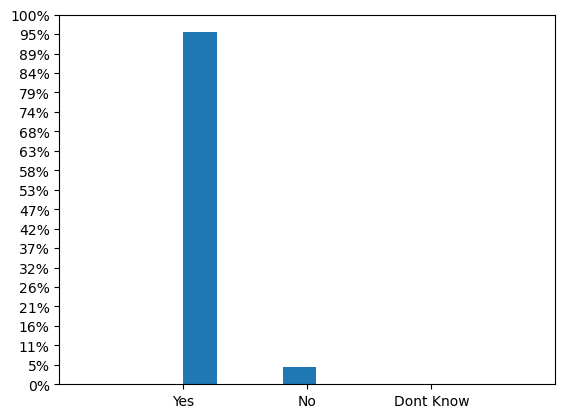

In [26]:
from matplotlib.ticker import PercentFormatter

plt.hist(df['PAXCAL'],bins=30,weights=np.ones(len(df)) / len(df))
plt.xticks(ticks=[1,2,3],labels=['Yes','No','Dont Know'])
plt.xlim([0,4])
plt.yticks(ticks=list(np.linspace(0,1,20)))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

## PAXDAY
4th column. 1:7 = Monday:Sunday, . = Missing (in the paper, j in {1,...,7}).

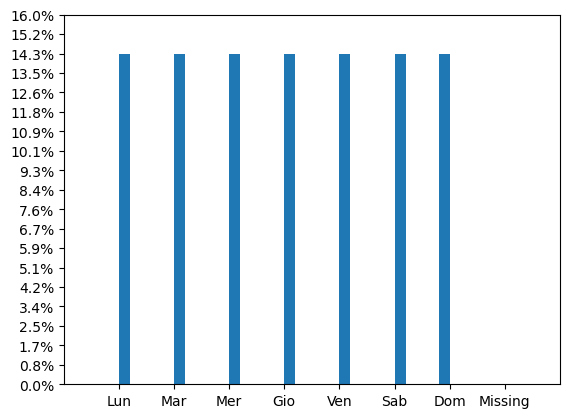

In [34]:
plt.hist(df['PAXDAY'],bins=30,weights=np.ones(len(df)) / len(df))
plt.xticks(ticks=[1,2,3,4,5,6,7,8],labels=['Lun', 'Mar', 'Mer', 'Gio', 'Ven', 'Sab', 'Dom','Missing'])
plt.xlim([0,9])
plt.yticks(ticks=list(np.linspace(0,0.16,20)))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

## PAXN
5th column. The person-level sequential observation number recorded in the device. I.e., given an individual, this is the nth observation for him.

In [36]:
obs_per_individual = []
for i in df['SEQN'].unique():
    obs_per_individual.append(max(df.loc[df['SEQN']==i,'PAXN']))

In [59]:
for i in np.unique(obs_per_individual):
    count = obs_per_individual.count(i)
    print('There are {} individuals with {} measurements'.format(count, i))

There are 1 individuals with 32.0 measurements
There are 1 individuals with 1162.0 measurements
There are 1 individuals with 1345.0 measurements
There are 1 individuals with 1390.0 measurements
There are 1 individuals with 2281.0 measurements
There are 1 individuals with 2989.0 measurements
There are 1 individuals with 3103.0 measurements
There are 1 individuals with 4546.0 measurements
There are 1 individuals with 5313.0 measurements
There are 1 individuals with 5320.0 measurements
There are 1 individuals with 7963.0 measurements
There are 1 individuals with 7993.0 measurements
There are 1 individuals with 8077.0 measurements
There are 1 individuals with 9191.0 measurements
There are 1 individuals with 9220.0 measurements
There are 1 individuals with 9459.0 measurements
There are 1 individuals with 9483.0 measurements
There are 1 individuals with 9551.0 measurements
There are 1 individuals with 9561.0 measurements
There are 1 individuals with 9568.0 measurements
There are 7156 individ

## PAXHOUR and PAXMINUT
6th and 7th columns. The hour of the day for which the intensity value was recorded AND The minute of the hour for which the intensity value was recorded.
Nothing to observe :)

## PAXINTEN
8th column. The interesting one, the intensity value recorded by the physical activity monitor.

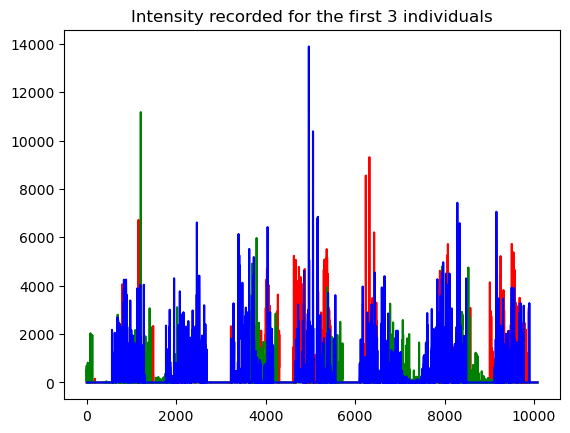

In [76]:
colours=['r','g','b']
plt.figure()     
for i in range(3):
    functional_datum = df.loc[df['SEQN']==df.loc[0,'SEQN']+i,:]
    plt.plot(range(len(functional_datum)),functional_datum['PAXINTEN'],colours[i])
plt.title('Intensity recorded for the first 3 individuals')
plt.show()

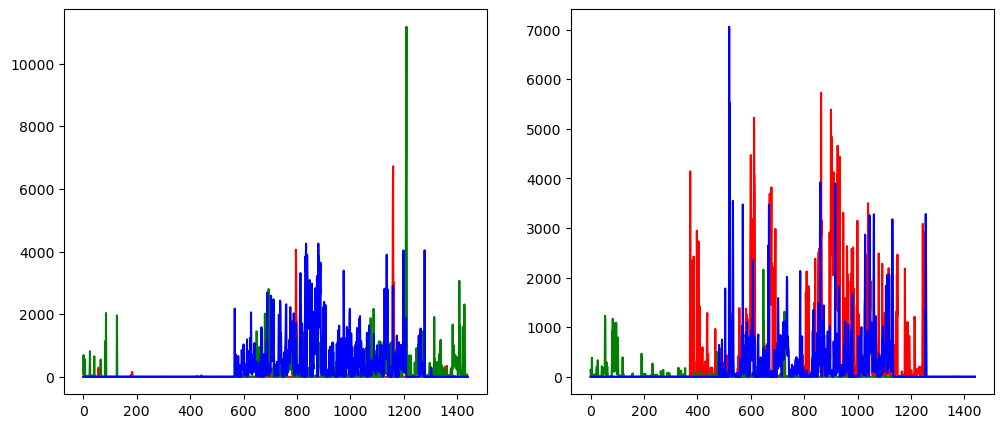

In [89]:
fig, ax = plt.subplots(1,2, figsize=(12,5))     
for i in range(3):
    functional_datum = df.loc[df['SEQN']==df.loc[0,'SEQN']+i,:]
    monday_datum = functional_datum.loc[functional_datum['PAXDAY']==1]
    sunday_datum = functional_datum.loc[functional_datum['PAXDAY']==7]
    ax[0].plot(range(len(monday_datum)),monday_datum['PAXINTEN'],colours[i])
    ax[1].plot(range(len(sunday_datum)),sunday_datum['PAXINTEN'],colours[i])
plt.show()